In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/european_co2_last5years.csv')

# Filter for only needed columns ('country', 'year', 'population', 'co2' (million tonnes), 'co2_per_capita')

relevant_columns = ['country', 'year', 'population', 'co2', 'co2_per_capita']

filtered_df = df[relevant_columns]
filtered_df.head()


,country,year,population,co2,co2_per_capita
0,Albania,2019,2885012.0,4.827,1.673
1,Albania,2020,2871951.0,4.711,1.640
2,Albania,2021,2849643.0,5.134,1.802
3,Albania,2022,2827615.0,5.173,1.830
4,Albania,2023,2811660.0,5.144,1.830


In [24]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 235 rows, 5 columns


In [23]:
# Get the distinct countries
distinct_countries_count = filtered_df['country'].nunique()
distinct_countries = filtered_df['country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')

There are 47 in the dataset
Countries: ['Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Denmark'
 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Kazakhstan' 'Kosovo' 'Latvia'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russia' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom']


In [12]:
filtered_df.describe()

,year,population,co2,co2_per_capita
count,250.000000,2.500000e+02,235.000000,235.000000
mean,2021.000000,1.723138e+07,124.409953,5.703970
std,1.417051,2.883240e+07,274.324174,2.518651
min,2019.000000,5.010000e+02,0.142000,1.640000
25%,2020.000000,1.856337e+06,8.383500,3.965000
50%,2021.000000,5.520460e+06,36.703000,5.091000
75%,2022.000000,1.156316e+07,86.185000,6.819500
max,2023.000000,1.465331e+08,1815.925000,15.741000


<Axes: >

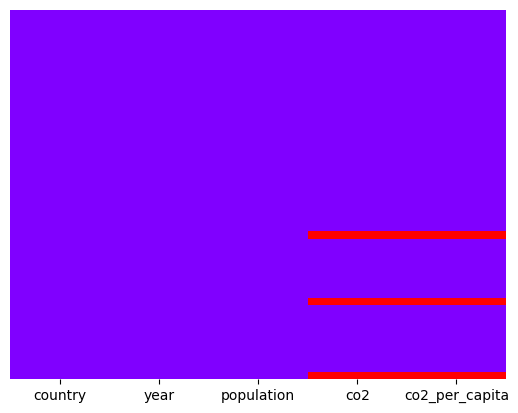

In [13]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

In [14]:
# Count null values
filtered_df.isnull().sum()


country            0
year               0
population         0
co2               15
co2_per_capita    15
dtype: int64

In [15]:
# Find rows with  null
null_co2_rows = filtered_df[filtered_df['co2'].isnull()]

# Display rows with null values
print("Rows with null 'co2':")
print(null_co2_rows)

# RESULT: Monaco, San Marino, Vatican -> Drop


Rows with null 'co2':
        country  year  population  co2  co2_per_capita
150      Monaco  2019     38131.0  NaN             NaN
151      Monaco  2020     38074.0  NaN             NaN
152      Monaco  2021     38548.0  NaN             NaN
153      Monaco  2022     38949.0  NaN             NaN
154      Monaco  2023     38978.0  NaN             NaN
195  San Marino  2019     34674.0  NaN             NaN
196  San Marino  2020     34796.0  NaN             NaN
197  San Marino  2021     34599.0  NaN             NaN
198  San Marino  2022     34113.0  NaN             NaN
199  San Marino  2023     33761.0  NaN             NaN
245     Vatican  2019       543.0  NaN             NaN
246     Vatican  2020       536.0  NaN             NaN
247     Vatican  2021       527.0  NaN             NaN
248     Vatican  2022       513.0  NaN             NaN
249     Vatican  2023       501.0  NaN             NaN


In [16]:
# Drop rows for Monaco, San Marino, Vatican
countries_to_drop = ['Monaco', 'San Marino', 'Vatican']

filtered_df = filtered_df[~filtered_df['country'].isin(countries_to_drop)]
filtered_df.tail()


,country,year,population,co2,co2_per_capita
240,United Kingdom,2019,67110958.0,364.753,5.435
241,United Kingdom,2020,67351860.0,326.263,4.844
242,United Kingdom,2021,67668789.0,344.510,5.091
243,United Kingdom,2022,68179315.0,313.835,4.603
244,United Kingdom,2023,68682965.0,305.146,4.443


In [17]:
print(f'Data shape after dropping 3 countries (rows, columns): {filtered_df.shape}')

Data shape after dropping 3 countries (rows, columns): (235, 5)


In [9]:
unique_values_count = filtered_df['country'].nunique()
unique_values_count = filtered_df['country'].nunique()
print(f'{unique_values_count}')

48


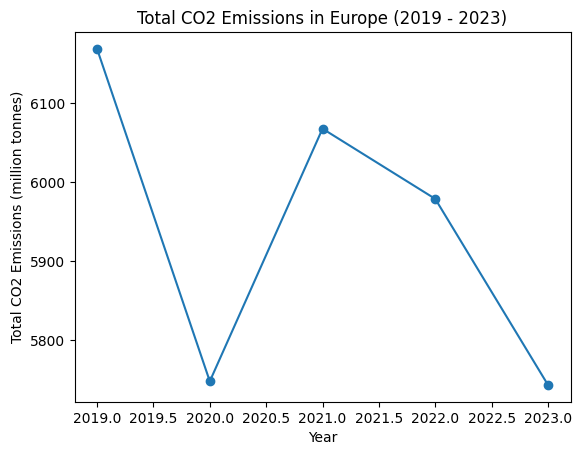

In [108]:
# TREND ANALYSIS OVER TIME - TOTAL CO2 EMISSIONS OVER THE YEARS

yearly_co2 = filtered_df.groupby('year')['co2'].sum()
plt.plot(yearly_co2.index, yearly_co2.values, marker='o')
plt.title('Total CO2 Emissions in Europe (2019 - 2023)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (million tonnes)')
plt.show()


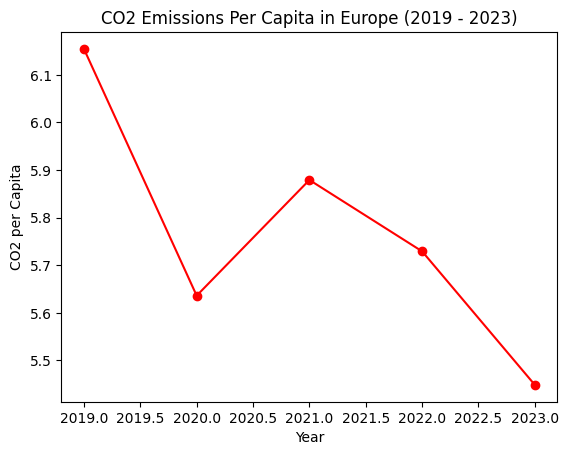

In [109]:
# TREND ANALYSIS OVER TIME - CO2 EMISSIONS PER CAPITA THE YEARS

yearly_co2_per_capita = filtered_df.groupby('year')['co2_per_capita'].mean()
plt.plot(yearly_co2_per_capita.index, yearly_co2_per_capita.values, marker='o', color='red')
plt.title('CO2 Emissions Per Capita in Europe (2019 - 2023)')
plt.xlabel('Year')
plt.ylabel('CO2 per Capita')
plt.show()

            country      co2
199          Russia 1815.925
89          Germany  596.151
239          Turkey  432.077
114           Italy  313.461
249  United Kingdom  305.146
184          Poland  289.282
79           France  272.476
119      Kazakhstan  255.161
224           Spain  221.616
244         Ukraine  136.461


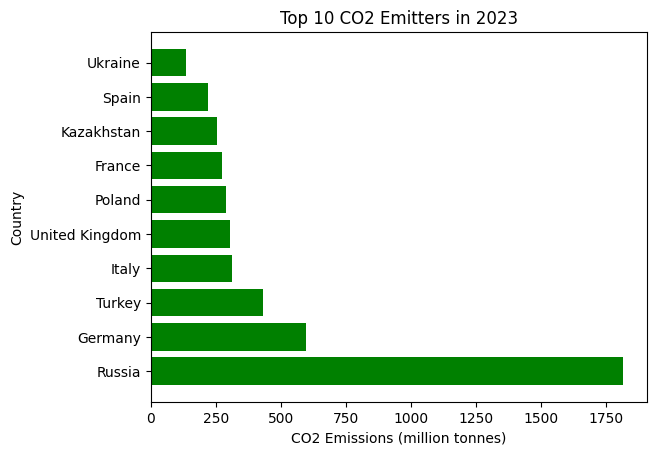

In [105]:
# TOP CO2 EMISSIONS IN 2023

data_2023 = filtered_df[filtered_df['year'] == 2023]

# Sort countries by CO2 emissions in 2023
top_emitters = data_2023[['country', 'co2']].sort_values(by='co2', ascending=False)

# Display the top 10 emitters in 2023
print(top_emitters.head(10))

# Plot the top 10 emitters
plt.barh(top_emitters['country'][:10], top_emitters['co2'][:10], color='green')
plt.title('Top 10 CO2 Emitters in 2023')
plt.xlabel('CO2 Emissions (million tonnes)')
plt.ylabel('Country')
plt.show()



        country  co2_per_capita
119  Kazakhstan          12.551
199      Russia          12.486
144  Luxembourg          10.514
104     Iceland           9.708
59      Czechia           7.921
184      Poland           7.463
69      Estonia           7.328
34      Belgium           7.118
89      Germany           7.051
179      Norway           7.048


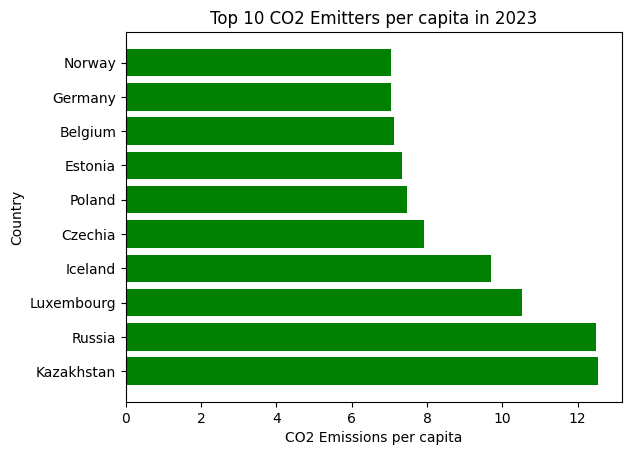

In [ ]:
# TOP CO2 EMISSIONS PER CAPITA IN 2023

data_2023 = filtered_df[filtered_df['year'] == 2023]

# Sort countries by CO2 emissions in 2023
top_emitters = data_2023[['country', 'co2_per_capita']].sort_values(by='co2_per_capita', ascending=False)

# Display the top 10 emitters in 2023
print(top_emitters.head(10))

# Plot the top 10 emitters
plt.barh(top_emitters['country'][:10], top_emitters['co2_per_capita'][:10], color='green')
plt.title('Top 10 CO2 Emitters per capita in 2023')
plt.xlabel('CO2 Emissions per capita')
plt.ylabel('Country')
plt.show()